Link para o Dataset: [Kaggle](https://www.kaggle.com/datasets/jackdaoud/marketing-data)

Integrantes:

550373 - Leonardo Yuuki Nakazone

99119 - Leonardo Blanco Pérez Ribeiro

98082 - Paulo Henrique Luchini Ferreira

97999 - Gustavo Moreira Gonçalves

552184 - Daniel Soares Delfin

#Configurando o ambiente:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("Dataset.csv")

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

#Visualização

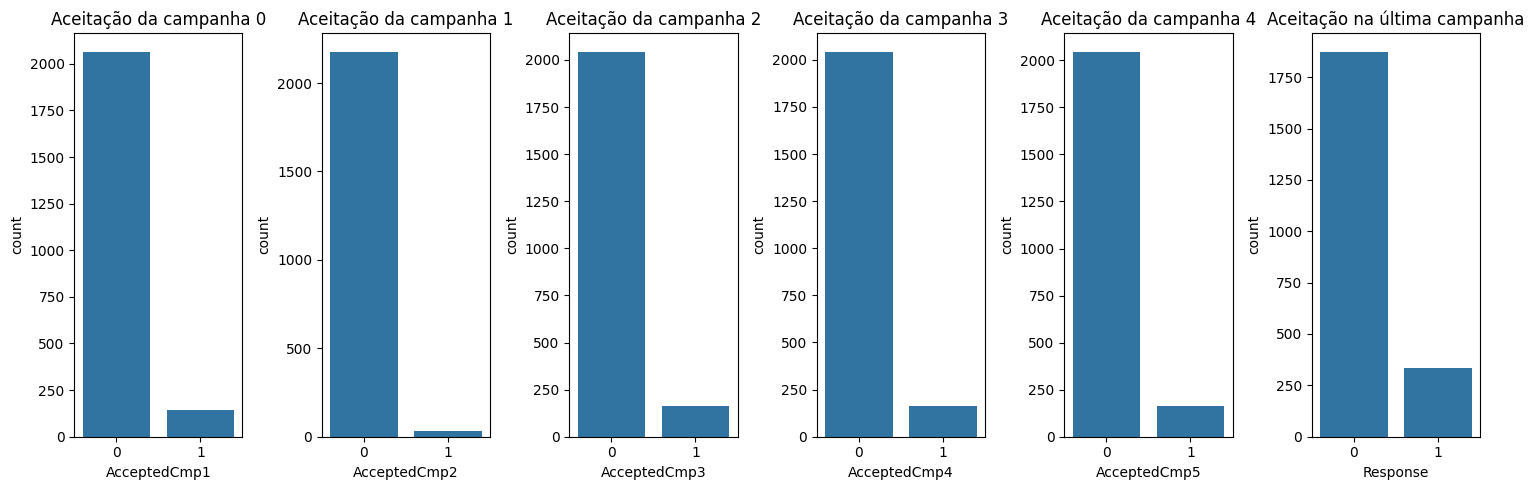

In [ ]:
binary_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

fig, axes = plt.subplots(1, 6, figsize=(15, 5))

for i, col in enumerate(binary_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Aceitação da campanha {i}')
    if i == 5:
      axes[i].set_title(f'Aceitação na última campanha')
plt.tight_layout()
plt.show()


<Axes: xlabel='Response', ylabel='Age'>

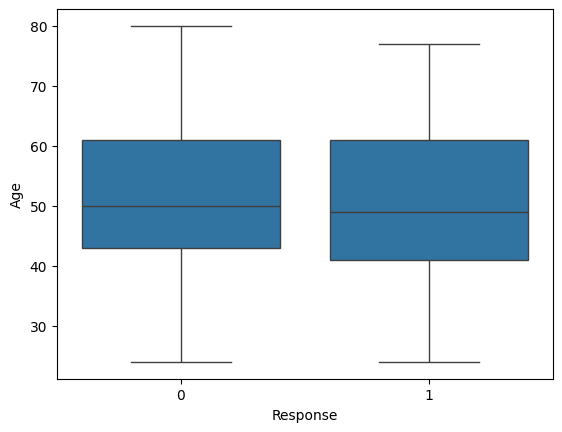

In [ ]:
sns.boxplot(x='Response', y='Age', data=df)

#Pre-Processamento

In [ ]:

X = df.drop('Response', axis=1)
y = df['Response']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Treinamento e avaliação

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8912386706948641
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       571
           1       0.72      0.34      0.46        91

    accuracy                           0.89       662
   macro avg       0.81      0.66      0.70       662
weighted avg       0.88      0.89      0.87       662



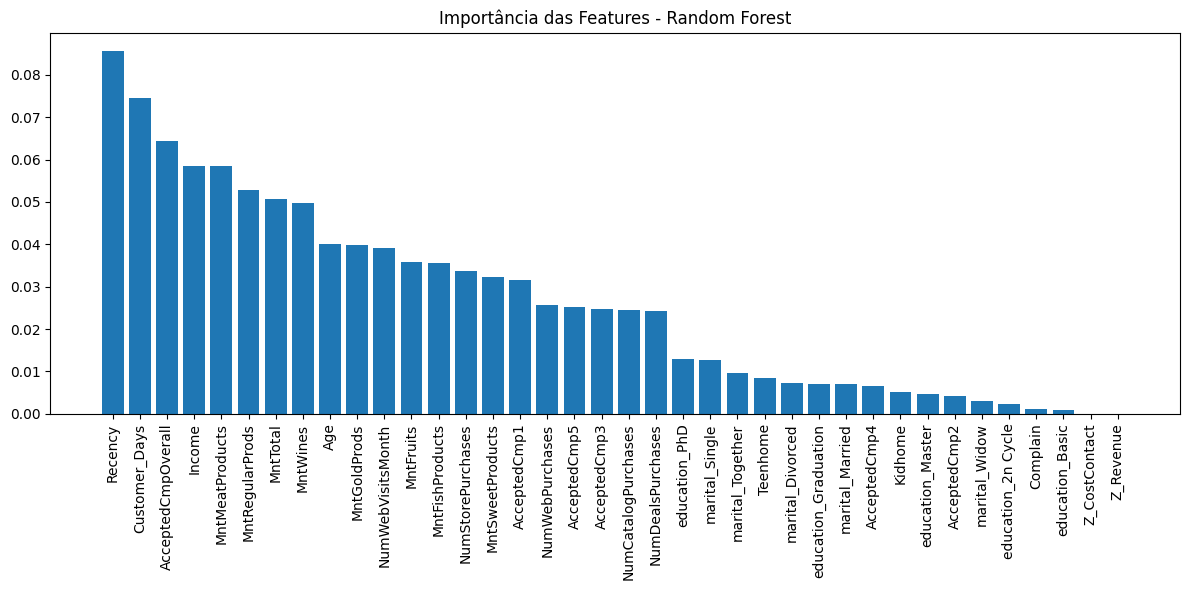

In [ ]:

feature_importances = rf_model.feature_importances_

# Ordenação das features por importância
indices = np.argsort(feature_importances)[::-1]


plt.figure(figsize=(12, 6))
plt.title("Importância das Features - Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

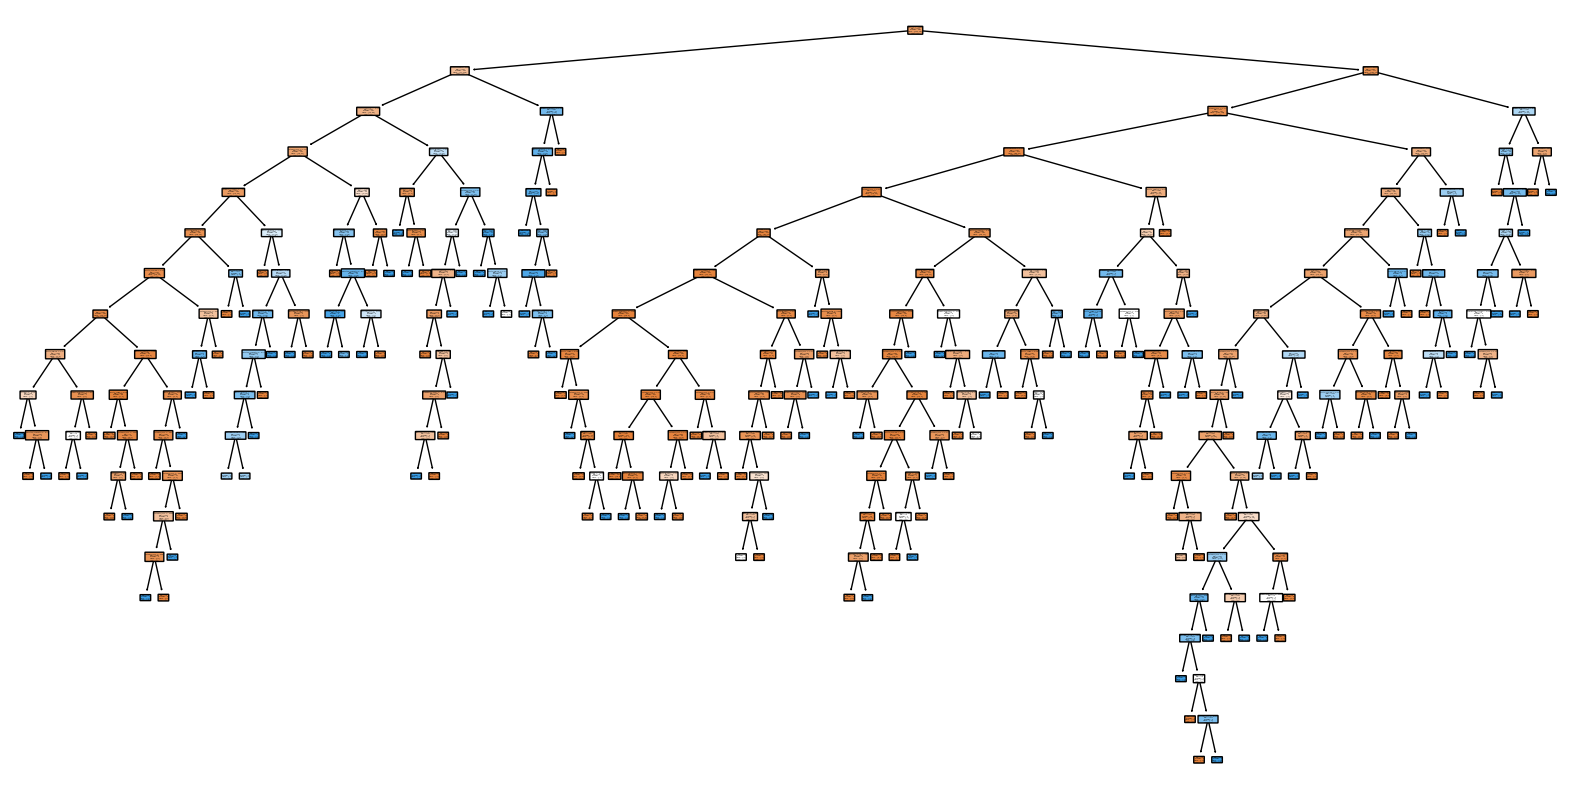

In [ ]:
estimator = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X.columns, class_names=["Não", "Sim"], filled=True, rounded=True)
plt.show()